# Deep Learning (2021)


## Tensorflow for Deep Neural Networks

This part of the assignment involves working with the **FashionMNIST** dataset for *image recognition task*. 

It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [2]:
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data()

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [3]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full =  X_train_full_img.reshape((num_train, X_train_full_img.shape[1]**2))
X_test = X_test_img.reshape((num_test, X_test_img.shape[1]**2))
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Then preprocess the dataset and split into training, validation, and testing datasets


In [4]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, y_train = X_train_full[:i,], y_train_full[:i,]
X_valid, y_valid = X_train_full[i:,], y_train_full[i:,]
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

Let's visualize the first $36$ images in X_train_full_img with labels as shown in the following figure.

The class names of Fashion MNIST are as follows:

"1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

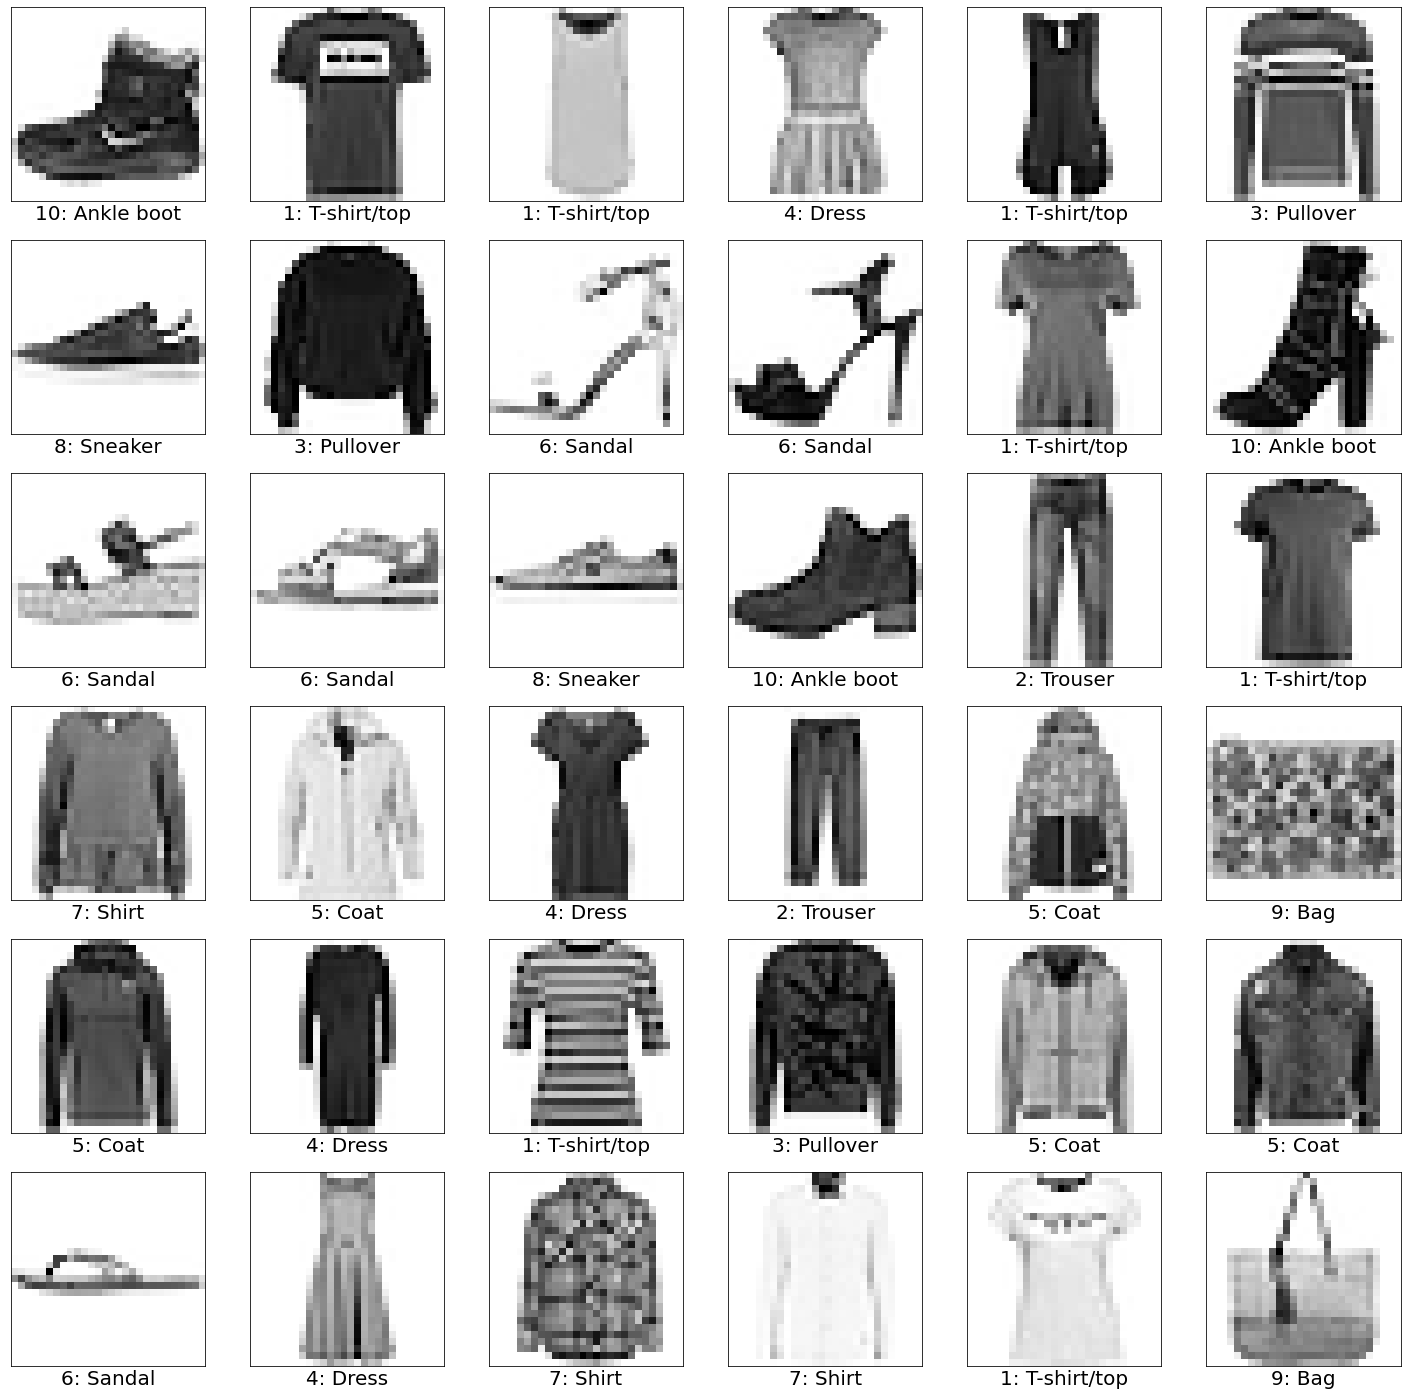

In [7]:
img_class = {1:"T-shirt/top", 2:"Trouser",
               3:"Pullover", 4:"Dress", 5:"Coat",
               6:"Sandal", 7:"Shirt", 8:"Sneaker", 
               9:"Bag", 10:"Ankle boot"}
n_class = len(img_class)
num_imgs = 36
fig = plt.figure(figsize = (25,25))
nrows = int(num_imgs/6)
ncols = int(num_imgs/nrows)
for i in range(num_imgs):
    p = fig.add_subplot(nrows,ncols,i+1,xticks=[],yticks=[])
    p.imshow(X_train_full_img[i], cmap = 'Greys')
    title = str(y_train_full[i]+1) + ": " + img_class[y_train_full[i]+1]
    p.set_xlabel(title, color = 'black', fontsize = 20)

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [8]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
ff_model = Sequential()
ff_model.add(Dense(units = 20,  input_shape = (784,), activation = 'relu'))
ff_model.add(Dense(units = 25, activation = 'relu'))
ff_model.add(Dense(units = n_class, activation = 'softmax'))

ff_model.build()
ff_model.summary()

ff_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = ff_model.fit(x = X_train, y = y_train, epochs = 20, validation_data = (X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 16,485
Trainable params: 16,485
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1688/1688 [==============================] - 1s 513us/step - loss: 0.6054 - accuracy: 0.7888 - val_loss: 0.5295 - val_accuracy: 0.8265
Epoch 2/20
1688/1688 [==============================] - 1s 467us/step - loss: 0.4333 - accuracy: 0.8490 - val_loss: 0.3980 - val_accuracy: 0.8575
Epoch 3/20
1688/1688 [==============================] - 1s 463us/step - loss: 0.3983 - acc

In [9]:
ff_model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 319us/step - loss: 0.3829 - accuracy: 0.8693


[0.38293376564979553, 0.8693000078201294]

We can then tune hyper-parameters with grid search.

Assume that you need to tune the number of neurons on the first hidden layer $n_1 \in \{10, 20, 30, 40\}$ and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the pattern $784 \rightarrow n_1 (act) \rightarrow 25(act) \rightarrow 10(softmax)$ where $n_1$ and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1$ and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [10]:
neurons = [10,20,30,40]
activation_functions = ['sigmoid','tanh','relu']
epochs = 20
results = {}
for act in activation_functions:
    results[act] = {}
    for n1 in neurons:
        ff_model = Sequential()
        ff_model.add(Dense(units = n1,  input_shape = (784,), activation = act))
        ff_model.add(Dense(units = 25, activation = act))
        ff_model.add(Dense(units = n_class, activation = 'softmax'))

        ff_model.build()

        ff_model.compile(optimizer=tf.keras.optimizers.Adam(),
                         loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

        history = ff_model.fit(x = X_train, y = y_train, epochs = epochs, validation_data = (X_valid, y_valid),
                               verbose = 0)
        results[act][n1] = history.history

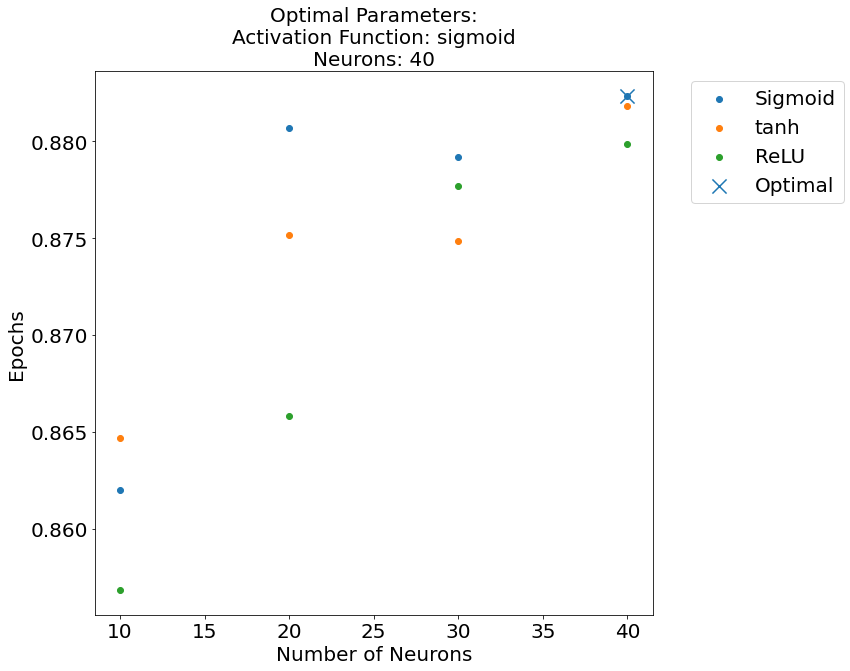

In [11]:
plt.figure(figsize=(10,10))
colours = ["tab:blue", "tab:orange", "tab:green"]
legend_handles = {'sigmoid':'Sigmoid','tanh':'tanh','relu':'ReLU','Optimal':'Optimal'}
max_val = 0
i = 0
for act in activation_functions:
    for n1 in neurons:
        x = n1
        y = results[act][n1]['val_accuracy'][-1]
        plt.scatter(x,y,c = colours[i], label = legend_handles[act])
        if y > max_val:
            max_val = y
            max_act = act
            max_n = n1
            max_col = colours[i]
    i += 1
plt.scatter(max_n, results[max_act][max_n]['val_accuracy'][-1], 
            marker = "x", s = 200, c = max_col, label = legend_handles["Optimal"])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize = 20, bbox_to_anchor=(1.05, 1), loc = 'upper left')
title_str = "Optimal Parameters:\nActivation Function: {}".format(max_act)
title_str += "\nNeurons: {}".format(n1)
plt.title(title_str, fontsize = 20)
plt.ylabel("Epochs", fontsize = 20)
plt.xlabel("Number of Neurons", fontsize = 20)
plt.tick_params(axis='both', labelsize = 20)

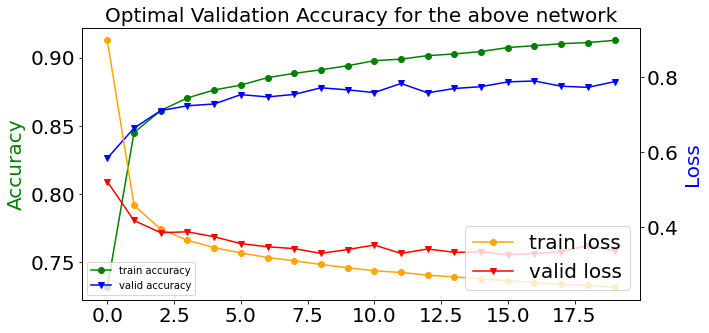

In [12]:
opt = results[max_act][max_n]
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1.plot(opt['accuracy'], label='train accuracy', color='green', marker="o")
ax1.plot(opt['val_accuracy'], label='valid accuracy', color='blue', marker = "v")
ax2.plot(opt['loss'], label = 'train loss', color='orange', marker="o")
ax2.plot(opt['val_loss'], label = 'valid loss', color='red', marker = "v")
plt.title("Optimal Validation Accuracy for the above network", fontsize = 20)
ax1.set_ylabel('Accuracy', color='g', fontsize = 20)
ax2.set_ylabel('Loss', color='b', fontsize = 20)
ax1.tick_params(axis='both', labelsize = 20)
ax2.tick_params(axis='both', labelsize = 20)
ax1.legend(loc=3)
ax2.legend(loc=4,fontsize=20)

Now we can experiment with temperature-based softmax

Given a temperature parameter $\tau>0$, we define a temperature-based $\tau-softmax$ as follows
- Given $h=[h_m]_{m=1}^M$, $p = \tau-softmax(h)$ if $p = [p_m]_{m=1}^M$ with $p_{m}=\frac{exp\left(\frac{h_{m}}{\tau}\right)}{\sum_{i=1}^{M}exp\left(\frac{h_{i}}{\tau}\right)}$ for $m \in \{1,2,...,M\}$.

The feed-foward neural network will have architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(\tau-softmax)$ for which we apply $\tau-softmax$ to logits to transform it to predection probabilities. Set $\tau \in \{0.1, 0.5, 0.8\}$ respectively and train the above network with those temperature parameters.

In [13]:
def temp_softmax(x):
    return tf.math.exp(x/tau)/tf.reduce_sum(tf.math.exp(x/tau))

epochs = 20
taus = [0.1,0.5,0.8]
results = {}
for tau in taus:
    ff_temp_model = Sequential()
    ff_temp_model.add(Dense(units = 20,  input_shape = (784,), activation = 'relu'))
    ff_temp_model.add(Dense(units = 25, activation = 'relu'))
    ff_temp_model.add(Dense(units = n_class, activation = temp_softmax))

    ff_temp_model.build()

    ff_temp_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    history = ff_temp_model.fit(x = X_train, y = y_train, epochs = epochs, validation_data = (X_valid, y_valid),verbose=0)
    results[tau] = history.history

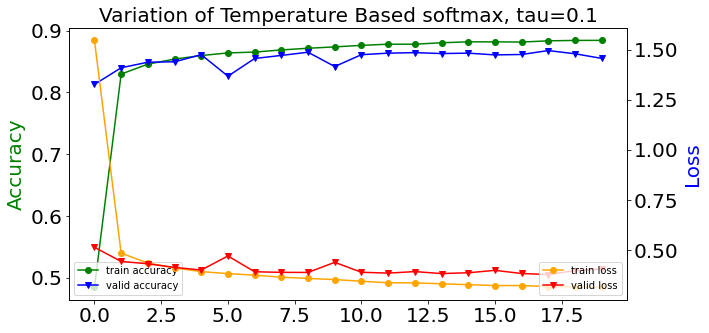

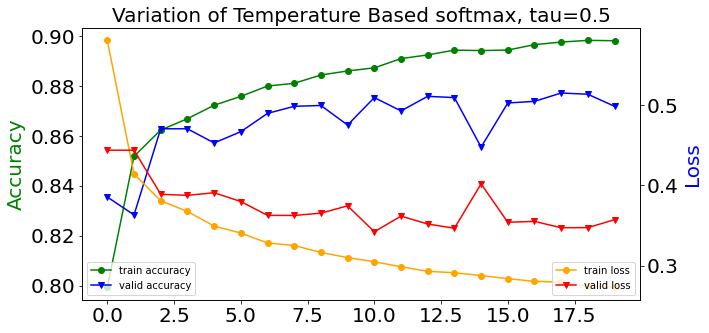

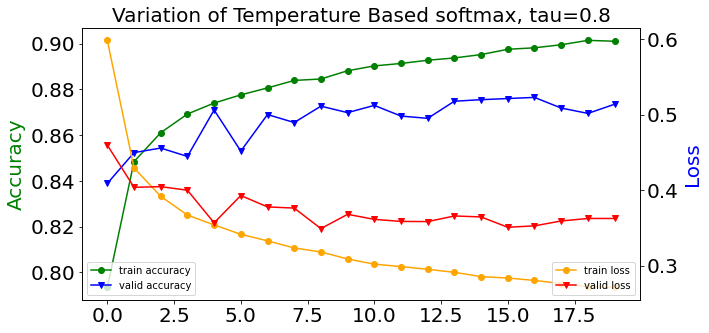

In [14]:
for tau in taus:
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax2 = ax1.twinx()
    ax1.plot(results[tau]['accuracy'], label='train accuracy', color='green', marker="o")
    ax1.plot(results[tau]['val_accuracy'], label='valid accuracy', color='blue', marker = "v")
    ax2.plot(results[tau]['loss'], label = 'train loss', color='orange', marker="o")
    ax2.plot(results[tau]['val_loss'], label = 'valid loss', color='red', marker = "v")
    plt.title("Variation of Temperature Based softmax, tau="+str(tau), fontsize = 20)
    ax1.set_ylabel('Accuracy', color='g', fontsize = 20)
    ax2.set_ylabel('Loss', color='b', fontsize = 20)
    ax1.tick_params(axis='both', labelsize = 20)
    ax2.tick_params(axis='both', labelsize = 20)
    ax1.legend(loc=3)
    ax2.legend(loc=4)

--- 